In [1]:
import re
import pandas as pd
import regrex
import numpy as np
import plotly.express as px
#from collection import Counter
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
%matplotlib inline

In [2]:
f = open('whatsappchat.txt','r',encoding = 'utf-8')
data = f.read()
print(data)

[02/02/23, 10:12:52 PM] PWSkills data science gro: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[02/02/23, 10:12:52 PM] ~ Vishvesh Jain: ‎~ Vishvesh Jain created this group
[07/02/23, 8:19:48 AM] PWSkills data science gro: ‎You joined using this group's invite link
[07/02/23, 8:19:48 AM] PWSkills data science gro: ‎This group was added to the community “PWSkills Data Science Gro”
[07/02/23, 8:19:48 AM] PWSkills data science gro: ‎Anyone in the community “PWSkills Data Science Gro” can request to join this group by messaging group admins.
[07/02/23, 8:40:57 AM] ~ Akshay Kore AK: ‎~ Akshay Kore AK joined using this group's invite link
[07/02/23, 9:12:38 AM] Joy: Bahi sabka assignment complete ho gya hain?
[07/02/23, 9:21:09 AM] ‪+91 91 82579 732‬: ‎‪+91 91 82579 732‬ joined using this group's invite link
[07/02/23, 9:16:25 AM] ~ rajan raj: No bro
[07/02/23, 9:17:25 AM] ~ Rahul Hazra: No no no
[07/02/23, 9:18:16 

In [3]:
pattern = r"\[\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}:\d{2}\s?(AM|PM)\]"


In [4]:
import re

# Example of your WhatsApp data
# data = """[07/02/23, 8:19:48 AM] PWSkills data science gro: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n
# [07/02/23, 9:00:00 AM] ~\u202fVishvesh Jain: \u200e~\u202fVishvesh Jain created this group\n
# [07/02/23, 10:00:00 PM] PWSkills data science gro: \u200eYou joined using this group's invite link\n
# [07/02/23, 11:00:00 AM] Joy: Bahi sabka assignment complete ho gya hain?\n"""

# Regular expression pattern for splitting by timestamp, but without capturing AM/PM
pattern = r"\[\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}:\d{2} (?:AM|PM)\]"

# Split the data
messages = re.split(pattern, data)[1:]  # Skip the first empty element

# Remove any occurrence of 'AM' or 'PM' left over in the messages list
filtered_messages = [msg for msg in messages if msg.strip() not in ['AM', 'PM']]

# Output the cleaned messages
print(filtered_messages)


[]


In [5]:
import re

# Example of your WhatsApp data (copy of your provided format)
# data = """[07/02/23, 8:19:48 AM] PWSkills data science gro: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n
# [07/02/23, 9:00:00 AM] ~\u202fVishvesh Jain: \u200e~\u202fVishvesh Jain created this group\n
# [07/02/23, 10:00:00 PM] PWSkills data science gro: \u200eYou joined using this group's invite link\n
# [07/02/23, 11:00:00 AM] Joy: Bahi sabka assignment complete ho gya hain?\n"""

# More flexible pattern that also accounts for possible hidden Unicode characters
pattern = r"\[\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}:\d{2}\s?(?:AM|PM)\]"

# Split the data using the adjusted pattern
messages = re.split(pattern, data)

# Remove any empty strings, 'AM', or 'PM' left over in the messages list
filtered_messages = [msg for msg in messages if msg.strip() and msg.strip() not in ['AM', 'PM']]

# Output the cleaned messages
print(filtered_messages)


[' PWSkills data science gro: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n', ' ~\u202fVishvesh Jain: \u200e~\u202fVishvesh Jain created this group\n', " PWSkills data science gro: \u200eYou joined using this group's invite link\n", ' PWSkills data science gro: \u200eThis group was added to the community “PWSkills Data Science Gro”\n', ' PWSkills data science gro: \u200eAnyone in the community “PWSkills Data Science Gro” can request to join this group by messaging group admins.\n', " ~\u202fAkshay Kore AK: \u200e~\u202fAkshay Kore AK joined using this group's invite link\n", ' Joy: Bahi sabka assignment complete ho gya hain?\n', " \u202a+91\xa091\xa082579\xa0732\u202c: \u200e\u202a+91\xa091\xa082579\xa0732\u202c joined using this group's invite link\n", ' ~\u202frajan raj: No bro\n', ' ~\u202fRahul Hazra: No no no\n', ' ~\u202fRahul: Bhai maine course le lia tha but kuch kam ki wjh se lectures nahi le pa

In [6]:
dates = re.findall(pattern,data)
dates

['[02/02/23, 10:12:52\u202fPM]',
 '[02/02/23, 10:12:52\u202fPM]',
 '[07/02/23, 8:19:48\u202fAM]',
 '[07/02/23, 8:19:48\u202fAM]',
 '[07/02/23, 8:19:48\u202fAM]',
 '[07/02/23, 8:40:57\u202fAM]',
 '[07/02/23, 9:12:38\u202fAM]',
 '[07/02/23, 9:21:09\u202fAM]',
 '[07/02/23, 9:16:25\u202fAM]',
 '[07/02/23, 9:17:25\u202fAM]',
 '[07/02/23, 9:18:16\u202fAM]',
 '[07/02/23, 9:18:24\u202fAM]',
 '[07/02/23, 9:19:03\u202fAM]',
 '[07/02/23, 9:19:22\u202fAM]',
 '[07/02/23, 9:19:44\u202fAM]',
 '[07/02/23, 9:19:51\u202fAM]',
 '[07/02/23, 9:20:01\u202fAM]',
 '[07/02/23, 9:20:29\u202fAM]',
 '[07/02/23, 9:20:54\u202fAM]',
 '[07/02/23, 9:21:23\u202fAM]',
 '[07/02/23, 9:28:47\u202fAM]',
 '[07/02/23, 10:16:15\u202fAM]',
 '[07/02/23, 10:18:16\u202fAM]',
 '[07/02/23, 10:23:32\u202fAM]',
 '[07/02/23, 10:27:04\u202fAM]',
 '[07/02/23, 10:27:27\u202fAM]',
 '[07/02/23, 10:27:32\u202fAM]',
 '[07/02/23, 10:27:35\u202fAM]',
 '[07/02/23, 10:27:48\u202fAM]',
 '[07/02/23, 10:28:09\u202fAM]',
 '[07/02/23, 10:28:24\u202fAM

In [7]:
print("Length of messages:", len(messages))
print("Length of dates:", len(dates))


Length of messages: 706
Length of dates: 705


In [8]:
# If dates are shorter than messages, fill the missing dates
while len(dates) < len(messages):
    dates.append(None)  # Or use a placeholder date

# Now you can safely create the DataFrame


In [9]:
print("Length of messages:", len(messages))
print("Length of dates:", len(dates))

Length of messages: 706
Length of dates: 706


In [10]:
import pandas as pd
import re

# Example of your WhatsApp data (replace with your actual data)
# data = """[02/02/23, 10:12:52 PM] Message 1\n
# [02/02/23, 11:15:00 AM] Message 2\n
# [02/02/23, 09:45:30 PM] Message 3\n"""

# Regular expression pattern for splitting by timestamp
pattern = r"\[\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}:\d{2}\s?(?:AM|PM)\]"

# Split the data
messages = re.split(pattern, data)[1:]  # The first element will be empty due to leading split

# Simulated dates extracted from the data
# dates = [
#     "02/02/23, 10:12:52 PM",
#     "02/02/23, 11:15:00 AM",
#     "02/02/23, 09:45:30 PM",
    #None  # Example of a None value that could cause an issue


# Check the dates list before processing
print("Original Dates List:", dates)

# Remove any whitespace characters (handling None values)
dates = [date.strip() for date in dates if date is not None]

# Check lengths of messages and dates
print("Length of messages:", len(messages))
print("Length of dates:", len(dates))

if len(messages) != len(dates):
    print("Mismatch in lengths! Adjust your data collection.")
else:
    # Create the DataFrame
    df = pd.DataFrame({'user_message': messages, 'message_date': dates})

    # Convert message_date to datetime
    try:
        df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M:%S %p', dayfirst=True)
    except ValueError as e:
        print("Error while converting date:", e)
        # You can further inspect the offending date strings here
        print(df['message_date'])

    # Rename the column
    df.rename(columns={'message_date': 'date'}, inplace=True)

    # Display the DataFrame
    print(df.head())


Original Dates List: ['[02/02/23, 10:12:52\u202fPM]', '[02/02/23, 10:12:52\u202fPM]', '[07/02/23, 8:19:48\u202fAM]', '[07/02/23, 8:19:48\u202fAM]', '[07/02/23, 8:19:48\u202fAM]', '[07/02/23, 8:40:57\u202fAM]', '[07/02/23, 9:12:38\u202fAM]', '[07/02/23, 9:21:09\u202fAM]', '[07/02/23, 9:16:25\u202fAM]', '[07/02/23, 9:17:25\u202fAM]', '[07/02/23, 9:18:16\u202fAM]', '[07/02/23, 9:18:24\u202fAM]', '[07/02/23, 9:19:03\u202fAM]', '[07/02/23, 9:19:22\u202fAM]', '[07/02/23, 9:19:44\u202fAM]', '[07/02/23, 9:19:51\u202fAM]', '[07/02/23, 9:20:01\u202fAM]', '[07/02/23, 9:20:29\u202fAM]', '[07/02/23, 9:20:54\u202fAM]', '[07/02/23, 9:21:23\u202fAM]', '[07/02/23, 9:28:47\u202fAM]', '[07/02/23, 10:16:15\u202fAM]', '[07/02/23, 10:18:16\u202fAM]', '[07/02/23, 10:23:32\u202fAM]', '[07/02/23, 10:27:04\u202fAM]', '[07/02/23, 10:27:27\u202fAM]', '[07/02/23, 10:27:32\u202fAM]', '[07/02/23, 10:27:35\u202fAM]', '[07/02/23, 10:27:48\u202fAM]', '[07/02/23, 10:28:09\u202fAM]', '[07/02/23, 10:28:24\u202fAM]', '[07/

In [11]:
df.head(10)

,user_message,date
0,PWSkills data science gro: ‎Messages and call...,"[02/02/23, 10:12:52 PM]"
1,~ Vishvesh Jain: ‎~ Vishvesh Jain created thi...,"[02/02/23, 10:12:52 PM]"
2,PWSkills data science gro: ‎You joined using ...,"[07/02/23, 8:19:48 AM]"
3,PWSkills data science gro: ‎This group was ad...,"[07/02/23, 8:19:48 AM]"
4,PWSkills data science gro: ‎Anyone in the com...,"[07/02/23, 8:19:48 AM]"
5,~ Akshay Kore AK: ‎~ Akshay Kore AK joined us...,"[07/02/23, 8:40:57 AM]"
6,Joy: Bahi sabka assignment complete ho gya ha...,"[07/02/23, 9:12:38 AM]"
7,‪+91 91 82579 732‬: ‎‪+91 91 82579 732‬ joine...,"[07/02/23, 9:21:09 AM]"
8,~ rajan raj: No bro\n,"[07/02/23, 9:16:25 AM]"
9,~ Rahul Hazra: No no no\n,"[07/02/23, 9:17:25 AM]"


In [12]:
df.shape

(705, 2)

In [13]:
import pandas as pd
import re

# Assuming df is already defined and contains 'user_message' and 'message_date'

# Initialize lists for users and messages
users = []
messages = []

# Loop through each message
for message in df['user_message']:
    # Using a regex to split by the first occurrence of a username pattern
    entry = re.split(r'([^\s]+):\s', message)  # Adjust regex to capture usernames correctly
    if len(entry) > 2:  # Means we have a user and a message
        users.append(entry[1])  # Username
        messages.append(entry[2])  # Message
    else:
        users.append('group_notification')  # Default for group notifications
        messages.append(entry[0])  # Use the message itself

# Create new columns in DataFrame
df['user'] = users
df['message'] = messages

# Drop the original user_message column
df.drop(columns=['user_message'], inplace=True)

# Display the resulting DataFrame
print(df.head())


                      date  user  \
0  [02/02/23, 10:12:52 PM]   gro   
1  [02/02/23, 10:12:52 PM]  Jain   
2   [07/02/23, 8:19:48 AM]   gro   
3   [07/02/23, 8:19:48 AM]   gro   
4   [07/02/23, 8:19:48 AM]   gro   

                                             message  
0  ‎Messages and calls are end-to-end encrypted. ...  
1              ‎~ Vishvesh Jain created this group\n  
2       ‎You joined using this group's invite link\n  
3  ‎This group was added to the community “PWSkil...  
4  ‎Anyone in the community “PWSkills Data Scienc...  


In [14]:
df.head(10)

,date,user,message
0,"[02/02/23, 10:12:52 PM]",gro,‎Messages and calls are end-to-end encrypted. ...
1,"[02/02/23, 10:12:52 PM]",Jain,‎~ Vishvesh Jain created this group\n
2,"[07/02/23, 8:19:48 AM]",gro,‎You joined using this group's invite link\n
3,"[07/02/23, 8:19:48 AM]",gro,‎This group was added to the community “PWSkil...
4,"[07/02/23, 8:19:48 AM]",gro,‎Anyone in the community “PWSkills Data Scienc...
5,"[07/02/23, 8:40:57 AM]",AK,‎~ Akshay Kore AK joined using this group's in...
6,"[07/02/23, 9:12:38 AM]",Joy,Bahi sabka assignment complete ho gya hain?\n
7,"[07/02/23, 9:21:09 AM]",732‬,‎‪+91 91 82579 732‬ joined using this group's ...
8,"[07/02/23, 9:16:25 AM]",raj,No bro\n
9,"[07/02/23, 9:17:25 AM]",Hazra,No no no\n


In [15]:
import pandas as pd
import re

# Sample DataFrame
# data = {
#     'date': [
#         '[02/02/23, 10:12:52 PM]',
#         '[02/02/23, 10:12:52 PM]',
#         '[07/02/23, 8:19:48 AM]',
#         '[07/02/23, 8:19:48 AM]',
#         '[07/02/23, 8:19:48 AM]',
#         '[07/02/23, 8:40:57 AM]',
#         '[07/02/23, 9:12:38 AM]',
#         '[07/02/23, 9:21:09 AM]',
#         '[07/02/23, 9:16:25 AM]',
#         '[07/02/23, 9:17:25 AM]'
#     ],
#     'user': [
#         'gro', 'Jain', 'gro', 'gro', 'gro', 
#         'AK', 'Joy', '732', 'raj', 'Hazra'
#     ],
#     'message': [
#         'Messages and calls are end-to-end encrypted. ...',
#         '~ Vishvesh Jain created this group\n',
#         'You joined using this group\'s invite link\n',
#         'This group was added to the community “PWSkills Data Science Gro”.\n',
#         'Anyone in the community “PWSkills Data Science Gro” can request to join this group by messaging group admins.\n',
#         '~ Akshay Kore AK joined using this group\'s invite link\n',
#         'Bahi sabka assignment complete ho gya hain?\n',
#         '+91 91 82579 732 joined using this group\'s invite link\n',
#         'No bro\n',
#         'No no no\n'
#     ]
# }

df1 = pd.DataFrame(df)

# Extract the timestamp from the 'date' column
df1['timestamp'] = df1['date'].str.extract(r'\[(.*?)]')[0]

# Convert the timestamp to datetime and change to 24-hour format
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%d/%m/%y, %I:%M:%S %p')

# Format the timestamp in 24-hour format
df1['timestamp'] = df1['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Drop the original 'date' column if not needed
df1.drop(columns=['date'], inplace=True)

# Display the updated DataFrame
print(df1.head())


   user                                            message  \
0   gro  ‎Messages and calls are end-to-end encrypted. ...   
1  Jain              ‎~ Vishvesh Jain created this group\n   
2   gro       ‎You joined using this group's invite link\n   
3   gro  ‎This group was added to the community “PWSkil...   
4   gro  ‎Anyone in the community “PWSkills Data Scienc...   

             timestamp  
0  2023-02-02 22:12:52  
1  2023-02-02 22:12:52  
2  2023-02-07 08:19:48  
3  2023-02-07 08:19:48  
4  2023-02-07 08:19:48  


In [16]:
df1.head()

,user,message,timestamp
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48


In [17]:
# Ensure the 'timestamp' column is in datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Extract the year from the 'timestamp' column
df1['year'] = df1['timestamp'].dt.year

# Display the updated DataFrame
print(df1[['timestamp', 'year']].head())


            timestamp  year
0 2023-02-02 22:12:52  2023
1 2023-02-02 22:12:52  2023
2 2023-02-07 08:19:48  2023
3 2023-02-07 08:19:48  2023
4 2023-02-07 08:19:48  2023


In [18]:
df1.head()

,user,message,timestamp,year
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023


In [19]:
# Ensure the 'timestamp' column is in datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Extract the month names from the 'timestamp' column
df1['month_name'] = df1['timestamp'].dt.month_name()

# Display the updated DataFrame
print(df1[['timestamp', 'month_name']].head())

            timestamp month_name
0 2023-02-02 22:12:52   February
1 2023-02-02 22:12:52   February
2 2023-02-07 08:19:48   February
3 2023-02-07 08:19:48   February
4 2023-02-07 08:19:48   February


In [20]:
df1.head()

,user,message,timestamp,year,month_name
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023,February
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023,February
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023,February
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023,February
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023,February


In [21]:
import pandas as pd

# Sample data
# data = {
#     'user': ['gro', 'Jain', 'gro', 'gro', 'gro'],
#     'message': [
#         'Messages and calls are end-to-end encrypted.',
#         '~ Vishvesh Jain created this group',
#         "You joined using this group's invite link",
#         'This group was added to the community “PWSkills Data Science Gro”.',
#         'Anyone in the community “PWSkills Data Science Gro” can request to join this group.'
#     ],
#     'timestamp': pd.to_datetime([
#         '2023-02-02 22:12:52',
#         '2023-02-02 22:12:52',
#         '2023-02-07 08:19:48',
#         '2023-02-07 08:19:48',
#         '2023-02-07 08:19:48'
#     ])
# }

# Create DataFrame
# df = pd.DataFrame(data)

# Extract year and month
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month_name()  # Gets month name
df1['day'] = df1['timestamp'].dt.day  # Extract day
df1['day_of_week'] = df1['timestamp'].dt.day_name()  # Extract day name

# Display the updated DataFrame
print(df1[['user', 'message', 'timestamp', 'year', 'month', 'day', 'day_of_week']])

# Count of messages per user
user_message_count = df1.groupby('user').size().reset_index(name='message_count')
print(user_message_count)

# Save to CSV
df1.to_csv('messages_data.csv', index=False)


          user                                            message  \
0          gro  ‎Messages and calls are end-to-end encrypted. ...   
1         Jain              ‎~ Vishvesh Jain created this group\n   
2          gro       ‎You joined using this group's invite link\n   
3          gro  ‎This group was added to the community “PWSkil...   
4          gro  ‎Anyone in the community “PWSkills Data Scienc...   
..         ...                                                ...   
700      Aamir  Hello Dear students anyone Complete Poower BI ...   
701  Chaudhary  https://youtube.com/shorts/pvpIGGMX9kg?si=JWL3...   
702     Tiwari  Greetings, I have become a primary member of t...   
703   Merchant  https://www.linkedin.com/posts/mahenoor-mercha...   
704   Merchant  https://www.linkedin.com/posts/mahenoor-mercha...   

              timestamp  year      month  day day_of_week  
0   2023-02-02 22:12:52  2023   February    2    Thursday  
1   2023-02-02 22:12:52  2023   February    2    Th

In [22]:
df1.head()

,user,message,timestamp,year,month_name,month,day,day_of_week
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023,February,February,2,Thursday
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023,February,February,2,Thursday
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023,February,February,7,Tuesday
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023,February,February,7,Tuesday
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023,February,February,7,Tuesday


In [23]:
df= df1.copy()

In [24]:
df.head()

,user,message,timestamp,year,month_name,month,day,day_of_week
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023,February,February,2,Thursday
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023,February,February,2,Thursday
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023,February,February,7,Tuesday
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023,February,February,7,Tuesday
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023,February,February,7,Tuesday


In [25]:
df.drop(columns=['month_name'],inplace = True)

In [26]:
df.head()

,user,message,timestamp,year,month,day,day_of_week
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023,February,2,Thursday
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023,February,2,Thursday
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023,February,7,Tuesday
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023,February,7,Tuesday
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023,February,7,Tuesday


In [27]:
# Separate hours and minutes
df['hour'] = df['timestamp'].dt.hour  # Extract hour
df['minute'] = df['timestamp'].dt.minute  # Extract minute

In [28]:
df.head()

,user,message,timestamp,year,month,day,day_of_week,hour,minute
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023-02-02 22:12:52,2023,February,2,Thursday,22,12
1,Jain,‎~ Vishvesh Jain created this group\n,2023-02-02 22:12:52,2023,February,2,Thursday,22,12
2,gro,‎You joined using this group's invite link\n,2023-02-07 08:19:48,2023,February,7,Tuesday,8,19
3,gro,‎This group was added to the community “PWSkil...,2023-02-07 08:19:48,2023,February,7,Tuesday,8,19
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023-02-07 08:19:48,2023,February,7,Tuesday,8,19


In [29]:
df.drop(columns=['timestamp'],inplace = True)

In [30]:
df.head()

,user,message,year,month,day,day_of_week,hour,minute
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023,February,2,Thursday,22,12
1,Jain,‎~ Vishvesh Jain created this group\n,2023,February,2,Thursday,22,12
2,gro,‎You joined using this group's invite link\n,2023,February,7,Tuesday,8,19
3,gro,‎This group was added to the community “PWSkil...,2023,February,7,Tuesday,8,19
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023,February,7,Tuesday,8,19


In [31]:
df.isnull().sum()

user           0
message        0
year           0
month          0
day            0
day_of_week    0
hour           0
minute         0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user         705 non-null    object
 1   message      705 non-null    object
 2   year         705 non-null    int32 
 3   month        705 non-null    object
 4   day          705 non-null    int32 
 5   day_of_week  705 non-null    object
 6   hour         705 non-null    int32 
 7   minute       705 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 33.2+ KB


In [33]:
df.drop(columns=['day_of_week'],inplace = True)

In [34]:
df.head()

,user,message,year,month,day,hour,minute
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023,February,2,22,12
1,Jain,‎~ Vishvesh Jain created this group\n,2023,February,2,22,12
2,gro,‎You joined using this group's invite link\n,2023,February,7,8,19
3,gro,‎This group was added to the community “PWSkil...,2023,February,7,8,19
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023,February,7,8,19


In [35]:
df

,user,message,year,month,day,hour,minute
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023,February,2,22,12
1,Jain,‎~ Vishvesh Jain created this group\n,2023,February,2,22,12
2,gro,‎You joined using this group's invite link\n,2023,February,7,8,19
3,gro,‎This group was added to the community “PWSkil...,2023,February,7,8,19
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023,February,7,8,19
...,...,...,...,...,...,...,...
700,Aamir,Hello Dear students anyone Complete Poower BI ...,2024,August,22,10,44
701,Chaudhary,https://youtube.com/shorts/pvpIGGMX9kg?si=JWL3...,2024,August,23,12,22
702,Tiwari,"Greetings, I have become a primary member of t...",2024,September,8,16,23
703,Merchant,https://www.linkedin.com/posts/mahenoor-mercha...,2024,September,10,19,39


In [36]:
x = df['user'].value_counts().head()

In [37]:
import matplotlib.pyplot as plt

C:\Users\f\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\f\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


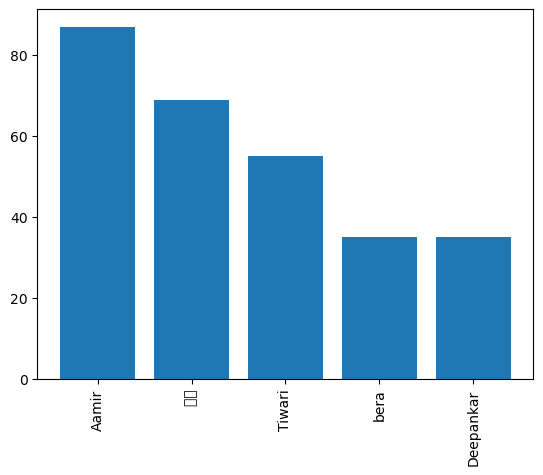

In [38]:
name = x.index
count = x.values
plt.bar(name,count)
plt.xticks(rotation= 'vertical')
plt.show()

In [39]:
temp = df[df['user']!= 'gro']
temp = temp[temp['message']!= '‎image omitted\n']

In [40]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [41]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [42]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,‎,88
1,code,32
2,link,25
3,message,25
4,‎~,21
5,assignment,21
6,python,20
7,‎this,18
8,deleted.,18
9,kro,17


In [43]:
df['message'].value_counts()

message
‎image omitted\n                                                                                                                                                 69
‎This message was deleted.\n                                                                                                                                     14
‎image omitted\n‎                                                                                                                                                14
Ok\n                                                                                                                                                              6
Okay\n                                                                                                                                                            5
                                                                                                                                                                 ..
Koi yeah

In [44]:
# remove group messages
# remove media

In [45]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [46]:
import emoji

In [49]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [51]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,👁,8
1,🗨,8
2,👍,6
3,☺,6
4,🙏,6
5,😊,5
6,😂,4
7,🥲,4
8,🔥,3
9,👉,3


In [54]:
df.head()

,user,message,year,month,day,hour,minute
0,gro,‎Messages and calls are end-to-end encrypted. ...,2023,February,2,22,12
1,Jain,‎~ Vishvesh Jain created this group\n,2023,February,2,22,12
2,gro,‎You joined using this group's invite link\n,2023,February,7,8,19
3,gro,‎This group was added to the community “PWSkil...,2023,February,7,8,19
4,gro,‎Anyone in the community “PWSkills Data Scienc...,2023,February,7,8,19


In [55]:
df['month_num'] = df['month'].dt.month
df

AttributeError: Can only use .dt accessor with datetimelike values